**Assignment5**

**1.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing

loc='/content/drive/MyDrive/Other-Material/'

boston = datasets.load_boston(return_X_y=False)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
mat=df.to_numpy()
#print(boston.DESCR)
print("Shape of matrix loaded:",mat.shape)
print("Number of Features:",mat.shape[1]-1)
print("Number of Patterns:",mat.shape[0])

Shape of matrix loaded: (506, 14)
Number of Features: 13
Number of Patterns: 506


In [2]:
def  cal_cost(w,X,y):
    m = len(y)
    predictions = X.dot(w)
    cost = (1/2) * np.sum(np.square(predictions-y))/m
    return cost
def  cal_cost_pred(pred,y):
    m = len(y)
    cost = (1/2) * np.sum(np.square(pred-y))/m
    return cost

In [3]:
def gradient_descent(X,y,theta,learning_rate=0.001,iterations=100,p=0.3):
    m = len(y)
    j_hist=[]
    prev=-1
    cost=0
    for it in range(iterations):
        cost=0
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        cost = cal_cost(theta,X,y)
        j_hist.append(cost)
        if abs(cost-prev)<p:
          break
        prev=cost
        
    return j_hist,theta

a)
i)

In [4]:
X=mat[:,:-1]
np.random.shuffle(X)  
X = preprocessing.normalize(X)
X=np.column_stack((np.ones(X.shape[0]),X))
Y=mat[:,-1]
Y=Y.reshape(mat.shape[0],1)
train_size=int(X.shape[0]*0.3)
val_size=int(X.shape[0]*0.1)
X_train,Y_train=X[0:train_size,:],Y[0:train_size,:]
X_val,Y_val=X[train_size:train_size+val_size,:],Y[train_size:train_size+val_size,:]
X_test,Y_test=X[train_size+val_size:,:],Y[train_size+val_size:,:]
print(X.shape,Y.shape)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)

(506, 14) (506, 1)
(151, 14) (151, 1)
(50, 14) (50, 1)
(305, 14) (305, 1)


[15.389797764151863, 51.30413696602867, 49.76134363903]


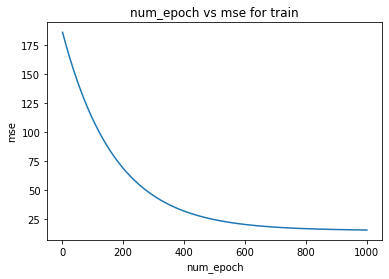

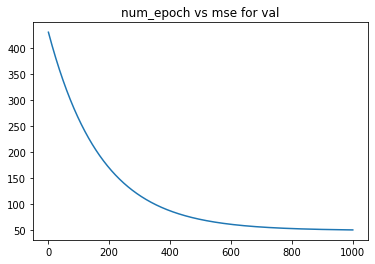

In [5]:
all_MSE=[0,0,0]
alpha=0.0015
epoch=1000
itr=np.arange(1,epoch+1,1)
w_ori= np.random.randn(X.shape[1],1)
j_train,w=gradient_descent(X_train,Y_train,w_ori,alpha,epoch,p=0)
all_MSE[0]=j_train[-1]
all_MSE[1]=cal_cost(w,X_test,Y_test)
j_val,w=gradient_descent(X_val,Y_val,w_ori,alpha,epoch,p=0)
all_MSE[2]=j_val[-1]

print(all_MSE)

fig=plt.figure()
plt.plot(itr,j_train)
plt.xlabel('num_epoch')
plt.ylabel('mse')
plt.title('num_epoch vs mse for train') 
plt.show() 

plt.plot(itr,j_val)
plt.title('num_epoch vs mse for val') 
plt.show() 

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
print("Test MSE ",cal_cost_pred(y_pred,Y_test))
y_pred = regressor.predict(X_train)
print("Train MSE ",cal_cost_pred(y_pred,Y_train))


Test MSE  51.866507114419505
Train MSE  12.31082242229105


**ii)**

In [7]:
X=mat[:,:-1]
np.random.shuffle(X)  
X=np.column_stack((np.ones(X.shape[0]),X))
Y=mat[:,-1]
Y=Y.reshape(mat.shape[0],1)
train_size=int(X.shape[0]*0.3)
val_size=int(X.shape[0]*0.1)
X_train,Y_train=X[0:train_size,:],Y[0:train_size,:]
X_val,Y_val=X[train_size:train_size+val_size,:],Y[train_size:train_size+val_size,:]
X_test,Y_test=X[train_size+val_size:,:],Y[train_size+val_size:,:]
print(X.shape,Y.shape)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)

(506, 14) (506, 1)
(151, 14) (151, 1)
(50, 14) (50, 1)
(305, 14) (305, 1)


[381848870.4695675, 396365580.6025855, 689429266.5829142]


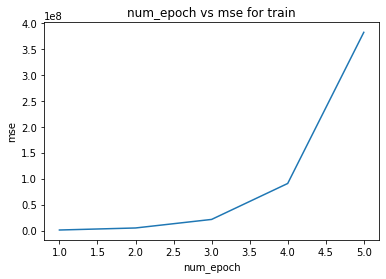

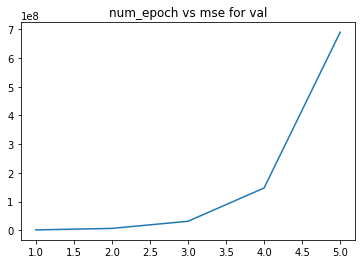

In [8]:
all_MSE=[0,0,0]
alpha=0.00001
epoch=5
itr=np.arange(1,epoch+1,1)
w_ori= np.random.randn(X.shape[1],1)
j_train,w=gradient_descent(X_train,Y_train,w_ori,alpha,epoch,p=0)
all_MSE[0]=j_train[-1]
all_MSE[1]=cal_cost(w,X_test,Y_test)
j_val,w=gradient_descent(X_val,Y_val,w_ori,alpha,epoch,p=0)
all_MSE[2]=j_val[-1]

print(all_MSE)

fig=plt.figure()
plt.plot(itr,j_train)
plt.xlabel('num_epoch')
plt.ylabel('mse')
plt.title('num_epoch vs mse for train') 
plt.show() 

plt.plot(itr,j_val)
plt.title('num_epoch vs mse for val') 
plt.show() 

In [9]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
print("Test MSE ",cal_cost_pred(y_pred,Y_test))
y_pred = regressor.predict(X_train)
print("Train MSE ",cal_cost_pred(y_pred,Y_train))


Test MSE  51.01523112666552
Train MSE  13.291995150354424
